<a href="https://colab.research.google.com/github/Uttam580/statistics/blob/master/Categorical_var_corr_cramerVtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Uttam580/New_learning-/master/datset/churn_data_st.csv')

In [0]:
churn_df = df.copy()

In [6]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [7]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [8]:
churn_df.corr()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,-0.090899,0.220173,0.100795
tenure,0.016567,1.000000,0.508526,0.247900,0.826066
ServiceCount,-0.090899,0.508526,1.000000,0.041463,0.443768
MonthlyCharges,0.220173,0.247900,0.041463,1.000000,0.650964
TotalCharges,0.100795,0.826066,0.443768,0.650964,1.000000


The H0 (Null Hypothesis): There is no relationship between variable one and variable two.

The H1 (Alternative Hypothesis): There is a relationship between variable 1 and variable 2.

If the p-value is significant, you can reject the null hypothesis and claim that the findings support the alternative hypothesis.

In [9]:
churn_df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

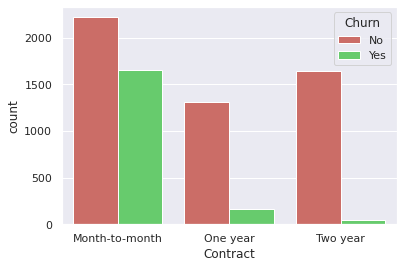

In [12]:
sns.set(style='darkgrid')
sns.set_palette('hls',3)
sns.countplot(x='Contract', hue='Churn',data=churn_df)

In [13]:
pd.crosstab(index=churn_df['Contract'],columns=churn_df['Churn'],margins=True)

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [0]:
contract_churn_ct = pd.crosstab(index=churn_df['Contract'],columns=churn_df['Churn'])

In [17]:
contract_churn_ct.iloc[0].values

array([2220, 1655])

In [0]:
from scipy import stats
(chi2,p,dof, _)= stats.chi2_contingency([contract_churn_ct.iloc[0].values,contract_churn_ct.iloc[1].values,contract_churn_ct.iloc[2].values])

In [31]:
print('chi2: ' ,chi2)
print('p : ' ,p)
print('dof : ',dof)

chi2:  1184.5965720837926
p :  5.863038300673391e-258
dof :  2


**Crammer V test **

In [32]:
np.sqrt(chi2/(churn_df.shape[0]))

0.4101156965761409

In [23]:
churn_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

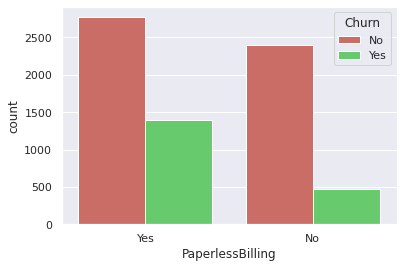

In [24]:
sns.set(style='darkgrid')
sns.set_palette('hls',3)
sns.countplot(x= churn_df['PaperlessBilling'], hue='Churn', data=churn_df)

In [25]:
pb_churn_df = pd.crosstab(index=churn_df['PaperlessBilling'], columns=df['Churn'])
pb_churn_df

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [0]:
(chi2, p,dof,_)= stats.chi2_contingency([pb_churn_df.iloc[0].values,pb_churn_df.iloc[1].values ])

In [27]:
print('chi2: ' ,chi2)
print('p : ' ,p)
print('dof : ',dof)

chi2:  258.27764906707307
p :  4.073354668665985e-58
dof :  1


In [28]:
np.sqrt(chi2/(churn_df.shape[0]))

0.19149814355338285

In [33]:
churn_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

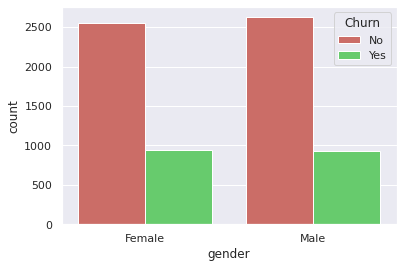

In [34]:
sns.set(style='darkgrid')
sns.set_palette('hls',3)
sns.countplot(x= churn_df['gender'], hue='Churn', data=churn_df)

In [35]:
gender_churn_df = pd.crosstab(index=churn_df['gender'], columns=df['Churn'])
gender_churn_df

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [0]:
(chi2, p,dof,_)= stats.chi2_contingency([gender_churn_df.iloc[0].values,gender_churn_df.iloc[1].values ])

In [37]:
print('chi2: ' ,chi2)
print('p : ' ,p)
print('dof : ',dof)

chi2:  0.4840828822091383
p :  0.48657873605618596
dof :  1


In [38]:
np.sqrt(chi2/(churn_df.shape[0])) # crammner v value 

0.008290505631771371

In [0]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [49]:
cramers_stat(gender_churn_df)

Churn
No     0.009673
Yes    0.016094
dtype: float64

In [50]:
cramers_stat(pb_churn_df)

Churn
No     0.223424
Yes    0.371740
dtype: float64